# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Define the problem you are finding answers for from the data given.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from scipy.stats import norm
import pylab

plt.style.use('fivethirtyeight')
%matplotlib inline

## 2017 Data Import and Cleaning

In [2]:
pwd

'/Users/vidhu/GA-classes/Vidhu-Project/Project1234/project_1/code'

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [3]:
#Code:
#df_sat_2017 = pd.read_csv(r'/Users/vidhu/Desktop/Vidhu-Project/Project1234/project_1/data/sat_2017.csv')
df_sat_2017 = pd.read_csv(r'/Users/vidhu/GA-classes/Vidhu-Project/Project1234/project_1/data/sat_2017.csv')
df_act_2017 = pd.read_csv(r'/Users/vidhu/GA-classes/Vidhu-Project/Project1234/project_1/data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [4]:
df_sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [5]:
#Code:
df_act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

In [6]:
df_sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [7]:
df_sat_2017.describe()
#sat math score min is 52 which is not correct

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


Answer:

In [8]:
df_act_2017.describe()
#min science score of act 2017 is 2.3 which is not correct
#will have to correct this score once index is set

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [9]:
#set index on column state for sat and act 2017 dataframe
df_act_2017.set_index('State',inplace=True)
df_sat_2017.set_index('State',inplace=True)

#### 4a. Does the data look complete? 

Answer: No

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer:Yes min score of SAT and ACT are not correct. Data cleaning needs to be done

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [10]:
#replace the min math score of sat 2017 with correct score from internet
#df_sat_2017['Maryland','math_sat']=524
df_sat_2017.at['Maryland','Math']= 524
#replace value of Science for 'Maryland'
df_act_2017.at['Maryland','Science']= 23.1

In [11]:
#check for act and sat 2017 description now
df_sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,556.882353,1126.098039
std,45.666901,47.121395,92.494812
min,482.000000,468.000000,950.000000
25%,533.500000,523.500000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [12]:
df_act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.440385
std,2.332132,1.963602,2.048672,1.721406
min,16.300000,18.000000,18.100000,18.200000
25%,19.000000,19.400000,20.475000,19.975000
50%,20.550000,20.900000,21.700000,21.300000
75%,23.300000,23.100000,24.125000,23.125000
max,25.500000,25.300000,26.000000,24.900000


#### 5. What are your data types? 
Display the data types of each feature. 

In [13]:
#code
#get the info of ACT_2017 data columns
df_act_2017.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, National to Wyoming
Data columns (total 6 columns):
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(2)
memory usage: 5.3+ KB


In [14]:
#get the info of SAT_2017 data columns
df_sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 4 columns):
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.5+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:in ACT_2017 
1. Composite coulmn should be float64 as its composite of English, Math, Reading and Science score

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

- Fix any individual values preventing other columns from being the appropriate type.

In [15]:
#to change columns 'Composite' datatype - check for unique values first
df_act_2017['Composite'].unique()

array(['21.0', '19.2', '19.8', '19.7', '19.4', '22.8', '20.8', '25.2',
       '24.1', '24.2', '21.4', '19.0', '22.3', '22.6', '21.9', '21.7',
       '20.0', '19.5', '24.3', '23.6', '25.4', '21.5', '18.6', '20.4',
       '20.3', '17.8', '25.5', '23.9', '19.1', '22.0', '21.8', '23.7',
       '24.0', '18.7', '20.7', '23.8', '20.5', '20.2x'], dtype=object)

In [16]:
#replace value '20.2x' with '20.2' for column Composite
df_act_2017['Composite']=df_act_2017['Composite'].str.replace('20.2x', '20.2')

In [17]:
#now change the type of column 'Composite'
df_act_2017['Composite']=df_act_2017['Composite'].astype('float64')

In [18]:
#code
#replace '%' symbol from Participation column and change datatype
df_act_2017['Participation']=df_act_2017['Participation'].str.replace('%','').astype('float64')

- Finish your data modifications by making sure the columns are now typed appropriately.

- Display the data types again to confirm they are correct.

In [19]:
#check if the type has been changed
df_act_2017.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, National to Wyoming
Data columns (total 6 columns):
Participation    52 non-null float64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(6)
memory usage: 5.3+ KB


In [20]:
df_act_2017.describe()

,Participation,English,Math,Reading,Science,Composite
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,65.153846,20.919231,21.173077,22.001923,21.440385,21.509615
std,31.832518,2.332132,1.963602,2.048672,1.721406,2.002083
min,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000
25%,31.000000,19.000000,19.400000,20.475000,19.975000,19.800000
50%,68.000000,20.550000,20.900000,21.700000,21.300000,21.400000
75%,100.000000,23.300000,23.100000,24.125000,23.125000,23.600000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [21]:
#df_sat_2017_interim.colmuns.str.replace(' ','_')
df_sat_2017.columns = df_sat_2017.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-','_')

In [22]:
#df_sat_2017_interim.colmuns.str.replace(' ','_')
df_act_2017.columns = df_act_2017.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-','_')

In [23]:
#add suffix to act score 2017 data frame
df_act_2017 = df_act_2017.add_suffix('_act')

In [24]:
#add suffix to sat score 2017 data frame
df_sat_2017 = df_sat_2017.add_suffix('_sat')

In [25]:
df_act_2017.head()

,participation_act,english_act,math_act,reading_act,science_act,composite_act
State,,,,,,
National,60.0,20.3,20.7,21.4,21.0,21.0
Alabama,100.0,18.9,18.4,19.7,19.4,19.2
Alaska,65.0,18.7,19.8,20.4,19.9,19.8
Arizona,62.0,18.6,19.8,20.1,19.8,19.7
Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [26]:
df_sat_2017.head()

,participation_sat,evidence_based_reading_and_writing_sat,math_sat,total_sat
State,,,,
Alabama,5%,593,572,1165
Alaska,38%,547,533,1080
Arizona,30%,563,553,1116
Arkansas,3%,614,594,1208
California,53%,531,524,1055


In [27]:
df_sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 4 columns):
participation_sat                         51 non-null object
evidence_based_reading_and_writing_sat    51 non-null int64
math_sat                                  51 non-null int64
total_sat                                 51 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.0+ KB


In [28]:
df_sat_2017 = df_sat_2017.rename(columns={'evidence_based_reading_and_writing_sat': 'ebrw_sat'})

In [29]:
#convert the columns type of sat2017 to float
df_sat_2017=df_sat_2017.astype({'ebrw_sat':float,'math_sat':float,'total_sat':float})

In [30]:
#remove % character in patricipation column in sat2017 data frame and change the type to float
df_sat_2017['participation_sat']=df_sat_2017['participation_sat'].str.replace('%','').astype('float64')

In [31]:
#check data type now
df_sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 4 columns):
participation_sat    51 non-null float64
ebrw_sat             51 non-null float64
math_sat             51 non-null float64
total_sat            51 non-null float64
dtypes: float64(4)
memory usage: 2.0+ KB


In [32]:
df_sat_2017.head()

,participation_sat,ebrw_sat,math_sat,total_sat
State,,,,
Alabama,5.0,593.0,572.0,1165.0
Alaska,38.0,547.0,533.0,1080.0
Arizona,30.0,563.0,553.0,1116.0
Arkansas,3.0,614.0,594.0,1208.0
California,53.0,531.0,524.0,1055.0


In [33]:
df_sat_2017.describe()

,participation_sat,ebrw_sat,math_sat,total_sat
count,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,556.882353,1126.098039
std,35.276632,45.666901,47.121395,92.494812
min,2.000000,482.000000,468.000000,950.000000
25%,4.000000,533.500000,523.500000,1055.500000
50%,38.000000,559.000000,548.000000,1107.000000
75%,66.000000,613.000000,599.000000,1212.000000
max,100.000000,644.000000,651.000000,1295.000000


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT/SAT|Name of state in USA (set as index)|
|participation|float|ACT/SAT|the 'percentage' of students that attend the exam in 2017 & 2018|
|reading_and_writing|float|SAT|Average Results from Evidence-based reading and writing exam in 2017 & 2018|
|total|float|SAT|Average Results from combine reading and writing and Math exam in 2017 & 2018|
|english|float|ACT|Average Results from english exam in 2017 & 2018|
|math|float|ACT|Average Results from Math exam in 2017 & 2018|
|reading|float|ACT|Average Results from reading exam in 2017 & 2018|
|science|float|ACT|Average Results from science exam in 2017 & 2018|
|composite|float|ACT|Average Results from average of all ACT exams in 2017 & 2018|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [34]:
#drop row 'National'
#since there is not much of the change in mean, std after removing the row 'national' so 
#with this number of rows of act2017 and sat2017 are inline
df_act_2017.drop('National',axis=0,inplace=True)

In [35]:
df_act_2017.describe()

,participation_act,english_act,math_act,reading_act,science_act,composite_act
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.449020,21.519608
std,32.140842,2.353677,1.981989,2.067271,1.737397,2.020695
min,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000
25%,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000
75%,100.000000,23.300000,23.100000,24.150000,23.150000,23.600000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [36]:
#Code:
df_merged_2017 = pd.merge(df_act_2017,df_sat_2017,how='left',on='State')
df_merged_2017.head()

,participation_act,english_act,math_act,reading_act,science_act,composite_act,participation_sat,ebrw_sat,math_sat,total_sat
State,,,,,,,,,,
Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593.0,572.0,1165.0
Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547.0,533.0,1080.0
Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563.0,553.0,1116.0
Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614.0,594.0,1208.0
California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531.0,524.0,1055.0


In [37]:
df_merged_2017.index.name

'State'

In [38]:
df_merged_2017.describe()

,participation_act,english_act,math_act,reading_act,science_act,composite_act,participation_sat,ebrw_sat,math_sat,total_sat
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.449020,21.519608,39.803922,569.117647,556.882353,1126.098039
std,32.140842,2.353677,1.981989,2.067271,1.737397,2.020695,35.276632,45.666901,47.121395,92.494812
min,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,482.000000,468.000000,950.000000
25%,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.000000,533.500000,523.500000,1055.500000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,38.000000,559.000000,548.000000,1107.000000
75%,100.000000,23.300000,23.100000,24.150000,23.150000,23.600000,66.000000,613.000000,599.000000,1212.000000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,644.000000,651.000000,1295.000000


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [39]:
#code
#sort the data frame
df_merged_2017.sort_values(by='State',ascending=True,inplace=True)
df_merged_2017.to_csv((r'/Users/vidhu/GA-classes/Vidhu-Project/Project1234/project_1/data/combined_2017.csv'))

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [40]:
#Code:
#Load data of sat2018 and act2018 in data frame
df_sat_2018 = pd.read_csv(r'/Users/vidhu/GA-classes/Vidhu-Project/Project1234/project_1/data/sat_2018.csv')
df_act_2018 = pd.read_csv(r'/Users/vidhu/GA-classes/Vidhu-Project/Project1234/project_1/data/act_2018.csv')

In [41]:
#set index as 'state' in both dataframes of 2018
df_sat_2018.set_index('State',inplace=True)
df_act_2018.set_index('State',inplace=True)
#verify the data type of columns in sat2018 data frame
df_sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 4 columns):
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.0+ KB


In [42]:
#replace Participation from value as percentage
df_sat_2018['Participation']=df_sat_2018['Participation'].str.replace('%','')

In [43]:
#change the type of columns to float except State
df_sat_2018=df_sat_2018.astype({'Participation':float,'Evidence-Based Reading and Writing':float,'Math':float,'Total':float})

In [44]:
#validate the data type of data frame after columns data type conversion
df_sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 4 columns):
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null float64
Math                                  51 non-null float64
Total                                 51 non-null float64
dtypes: float64(4)
memory usage: 2.0+ KB


In [45]:
#rename lengthy column name
df_sat_2018=df_sat_2018.rename(columns={'Evidence-Based Reading and Writing':'EBRW'})

In [46]:
#strip spaces and lower the column names
df_sat_2018.columns=df_sat_2018.columns.str.strip().str.lower()

In [47]:
#add suffix to the column names to identify column names as that of sat 
# columns_list=df_sat_2018.columns[~df_sat_2018.columns.str.contains('state')]
# df_sat_2018.rename(columns=dict(zip(columns_list,columns_list+'_sat')),inplace=True)
df_sat_2018 = df_sat_2018.add_suffix('_sat')

In [48]:
#validate column name changes - all coulmns of sat 2018 are in lower case and of type float
df_sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 4 columns):
participation_sat    51 non-null float64
ebrw_sat             51 non-null float64
math_sat             51 non-null float64
total_sat            51 non-null float64
dtypes: float64(4)
memory usage: 2.0+ KB


In [49]:
#check for data type of act 2018 data frame
df_act_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, Alabama to National
Data columns (total 6 columns):
Participation    53 non-null object
English          53 non-null float64
Math             53 non-null float64
Reading          53 non-null float64
Science          53 non-null float64
Composite        53 non-null float64
dtypes: float64(5), object(1)
memory usage: 2.9+ KB


In [50]:
#to change data type of column Participation check for unique values first
df_act_2018['Participation'].unique()

array(['100', '33', '66', '27', '30', '26', '17', '32', '53', '89', '36',
       '43', '68', '71', 'Not given', '7', '31', '25', '22', '99', '16',
       '67', '98', '42', '15', '77', '41', '24', '65'], dtype=object)

In [51]:
#correct the values of Participation column by checking the values from internet
df_act_2018.loc['Louisiana','Participation']='100'
df_act_2018.loc['North Carolina','Participation']='100'
df_act_2018.loc['Oklahoma','Participation']='100'
df_act_2018.loc['Pennsylvania','Participation']='20'
df_act_2018.loc['National','Participation']='100'

In [52]:
#Now remove % symbol in Participation column data values and change the data type in data frame act 2018
df_act_2018['Participation']=df_act_2018['Participation'].str.replace('%','').astype('float64')

In [53]:
#check for data type again
df_act_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, Alabama to National
Data columns (total 6 columns):
Participation    53 non-null float64
English          53 non-null float64
Math             53 non-null float64
Reading          53 non-null float64
Science          53 non-null float64
Composite        53 non-null float64
dtypes: float64(6)
memory usage: 5.4+ KB


In [54]:
#since there are 53 rows so check if there is any duplicate row
#Row with value 'National' is duplicate
df_act_2018[df_act_2018.duplicated()]

,Participation,English,Math,Reading,Science,Composite
State,,,,,,
National,100.0,20.2,20.5,21.3,20.7,20.8


In [55]:
#drop row that contains 'State' value as 'National'
df_act_2018.drop('National',axis=0,inplace=True)
df_act_2018.describe()

,Participation,English,Math,Reading,Science,Composite
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,61.647059,20.988235,21.125490,22.015686,21.345098,21.486275
std,34.080976,2.446356,2.035765,2.167245,1.870114,2.106278
min,7.000000,16.600000,17.800000,18.000000,17.900000,17.700000
25%,28.500000,19.100000,19.400000,20.450000,19.850000,19.950000
50%,66.000000,20.200000,20.700000,21.600000,21.100000,21.300000
75%,100.000000,23.700000,23.150000,24.100000,23.050000,23.550000
max,100.000000,26.000000,25.200000,26.100000,24.900000,25.600000


In [56]:
#change the column names to lower case
df_act_2018.columns=df_act_2018.columns.str.strip().str.lower()

In [57]:
#add suffix to act score 2018 data frame
df_act_2018 = df_act_2018.add_suffix('_act')

In [58]:
df_act_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 6 columns):
participation_act    51 non-null float64
english_act          51 non-null float64
math_act             51 non-null float64
reading_act          51 non-null float64
science_act          51 non-null float64
composite_act        51 non-null float64
dtypes: float64(6)
memory usage: 2.8+ KB


In [59]:
#Code:
df_merged_2018 = pd.merge(df_act_2018,df_sat_2018,how='left',on='State')
df_merged_2018.head()

,participation_act,english_act,math_act,reading_act,science_act,composite_act,participation_sat,ebrw_sat,math_sat,total_sat
State,,,,,,,,,,
Alabama,100.0,18.9,18.3,19.6,19.0,19.1,6.0,595.0,571.0,1166.0
Alaska,33.0,19.8,20.6,21.6,20.7,20.8,43.0,562.0,544.0,1106.0
Arizona,66.0,18.2,19.4,19.5,19.2,19.2,29.0,577.0,572.0,1149.0
Arkansas,100.0,19.1,18.9,19.7,19.4,19.4,5.0,592.0,576.0,1169.0
California,27.0,22.5,22.5,23.0,22.1,22.7,60.0,540.0,536.0,1076.0


In [60]:
df_merged_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 10 columns):
participation_act    51 non-null float64
english_act          51 non-null float64
math_act             51 non-null float64
reading_act          51 non-null float64
science_act          51 non-null float64
composite_act        51 non-null float64
participation_sat    51 non-null float64
ebrw_sat             51 non-null float64
math_sat             51 non-null float64
total_sat            51 non-null float64
dtypes: float64(10)
memory usage: 4.4+ KB


In [61]:
df_merged_2018.index.name

'State'

In [62]:
#code
#sort the data frame
df_merged_2018.sort_values(by='State',ascending=True,inplace=True)
df_merged_2018.to_csv((r'/Users/vidhu/GA-classes/Vidhu-Project/Project1234/project_1/data/combined_2018.csv'))

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [63]:
#Code:
df_merged_final = pd.merge(df_merged_2017.add_suffix('_2017'),df_merged_2018.add_suffix('_2018'),how='left',on='State')
#save the contents
df_merged_final.to_csv((r'/Users/vidhu/GA-classes/Vidhu-Project/Project1234/project_1/data/final.csv'))
df_merged_final.head()

,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2017,ebrw_sat_2017,math_sat_2017,total_sat_2017,participation_act_2018,english_act_2018,math_act_2018,reading_act_2018,science_act_2018,composite_act_2018,participation_sat_2018,ebrw_sat_2018,math_sat_2018,total_sat_2018
State,,,,,,,,,,,,,,,,,,,,
Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593.0,572.0,1165.0,100.0,18.9,18.3,19.6,19.0,19.1,6.0,595.0,571.0,1166.0
Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547.0,533.0,1080.0,33.0,19.8,20.6,21.6,20.7,20.8,43.0,562.0,544.0,1106.0
Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563.0,553.0,1116.0,66.0,18.2,19.4,19.5,19.2,19.2,29.0,577.0,572.0,1149.0
Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614.0,594.0,1208.0,100.0,19.1,18.9,19.7,19.4,19.4,5.0,592.0,576.0,1169.0
California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531.0,524.0,1055.0,27.0,22.5,22.5,23.0,22.1,22.7,60.0,540.0,536.0,1076.0


In [64]:
df_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 20 columns):
participation_act_2017    51 non-null float64
english_act_2017          51 non-null float64
math_act_2017             51 non-null float64
reading_act_2017          51 non-null float64
science_act_2017          51 non-null float64
composite_act_2017        51 non-null float64
participation_sat_2017    51 non-null float64
ebrw_sat_2017             51 non-null float64
math_sat_2017             51 non-null float64
total_sat_2017            51 non-null float64
participation_act_2018    51 non-null float64
english_act_2018          51 non-null float64
math_act_2018             51 non-null float64
reading_act_2018          51 non-null float64
science_act_2018          51 non-null float64
composite_act_2018        51 non-null float64
participation_sat_2018    51 non-null float64
ebrw_sat_2018             51 non-null float64
math_sat_2018             51 non-null float64
total_sat_2018   

In [65]:
df_merged_final.index.name

'State'

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [66]:
#Code:
df_merged_final.describe()

,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2017,ebrw_sat_2017,math_sat_2017,total_sat_2017,participation_act_2018,english_act_2018,math_act_2018,reading_act_2018,science_act_2018,composite_act_2018,participation_sat_2018,ebrw_sat_2018,math_sat_2018,total_sat_2018
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.449020,21.519608,39.803922,569.117647,556.882353,1126.098039,61.647059,20.988235,21.125490,22.015686,21.345098,21.486275,45.745098,563.686275,556.235294,1120.019608
std,32.140842,2.353677,1.981989,2.067271,1.737397,2.020695,35.276632,45.666901,47.121395,92.494812,34.080976,2.446356,2.035765,2.167245,1.870114,2.106278,37.314256,47.502627,47.772623,94.155083
min,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,482.000000,468.000000,950.000000,7.000000,16.600000,17.800000,18.000000,17.900000,17.700000,2.000000,480.000000,480.000000,977.000000
25%,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.000000,533.500000,523.500000,1055.500000,28.500000,19.100000,19.400000,20.450000,19.850000,19.950000,4.500000,534.500000,522.500000,1057.500000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,38.000000,559.000000,548.000000,1107.000000,66.000000,20.200000,20.700000,21.600000,21.100000,21.300000,52.000000,552.000000,544.000000,1098.000000
75%,100.000000,23.300000,23.100000,24.150000,23.150000,23.600000,66.000000,613.000000,599.000000,1212.000000,100.000000,23.700000,23.150000,24.100000,23.050000,23.550000,77.500000,610.500000,593.500000,1204.000000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,644.000000,651.000000,1295.000000,100.000000,26.000000,25.200000,26.100000,24.900000,25.600000,100.000000,643.000000,655.000000,1298.000000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [67]:
#code
def custom_standard_deviation(input_list):
    mean_of_list = np.mean(input_list)
    sum_sqr_diffmean=0
    for input_val in input_list:
        sum_sqr_diffmean=sum_sqr_diffmean+(input_val-mean_of_list)**2
    standard_dev = math.sqrt(sum_sqr_diffmean/len(input_list))
    return standard_dev

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [68]:
#Code:
std_dev_dict={col.name:custom_standard_deviation(col) for col in [df_merged_final[i] for i in df_merged_final.columns if (df_merged_final[i].dtype=='float64') or (df_merged_final[i].dtype=='int64')]}
std_dev_dict
                                                                  

{'participation_act_2017': 31.824175751231806,
 'english_act_2017': 2.3304876369363363,
 'math_act_2017': 1.9624620273436781,
 'reading_act_2017': 2.0469029314842646,
 'science_act_2017': 1.7202795656314875,
 'composite_act_2017': 2.000786081581989,
 'participation_sat_2017': 34.92907076664508,
 'ebrw_sat_2017': 45.21697020437866,
 'math_sat_2017': 46.65713364485503,
 'total_sat_2017': 91.58351056778743,
 'participation_act_2018': 33.745194881997506,
 'english_act_2018': 2.4222536143202795,
 'math_act_2018': 2.015707255555717,
 'reading_act_2018': 2.145891884510421,
 'science_act_2018': 1.8516885484833543,
 'composite_act_2018': 2.0855261815801147,
 'participation_sat_2018': 36.946619223539415,
 'ebrw_sat_2018': 47.03460978357609,
 'math_sat_2018': 47.30194550378352,
 'total_sat_2018': 93.22742384464433}

In [69]:
df_merged_final.describe()

,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2017,ebrw_sat_2017,math_sat_2017,total_sat_2017,participation_act_2018,english_act_2018,math_act_2018,reading_act_2018,science_act_2018,composite_act_2018,participation_sat_2018,ebrw_sat_2018,math_sat_2018,total_sat_2018
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.449020,21.519608,39.803922,569.117647,556.882353,1126.098039,61.647059,20.988235,21.125490,22.015686,21.345098,21.486275,45.745098,563.686275,556.235294,1120.019608
std,32.140842,2.353677,1.981989,2.067271,1.737397,2.020695,35.276632,45.666901,47.121395,92.494812,34.080976,2.446356,2.035765,2.167245,1.870114,2.106278,37.314256,47.502627,47.772623,94.155083
min,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,482.000000,468.000000,950.000000,7.000000,16.600000,17.800000,18.000000,17.900000,17.700000,2.000000,480.000000,480.000000,977.000000
25%,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.000000,533.500000,523.500000,1055.500000,28.500000,19.100000,19.400000,20.450000,19.850000,19.950000,4.500000,534.500000,522.500000,1057.500000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,38.000000,559.000000,548.000000,1107.000000,66.000000,20.200000,20.700000,21.600000,21.100000,21.300000,52.000000,552.000000,544.000000,1098.000000
75%,100.000000,23.300000,23.100000,24.150000,23.150000,23.600000,66.000000,613.000000,599.000000,1212.000000,100.000000,23.700000,23.150000,24.100000,23.050000,23.550000,77.500000,610.500000,593.500000,1204.000000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,644.000000,651.000000,1295.000000,100.000000,26.000000,25.200000,26.100000,24.900000,25.600000,100.000000,643.000000,655.000000,1298.000000


Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer: Almost but not exactly. There is a difference of some decimals in standard deviation between manually calculated standard deviation and pandas describe method

In [70]:
df_merged_final.std()

participation_act_2017    32.140842
english_act_2017           2.353677
math_act_2017              1.981989
reading_act_2017           2.067271
science_act_2017           1.737397
composite_act_2017         2.020695
participation_sat_2017    35.276632
ebrw_sat_2017             45.666901
math_sat_2017             47.121395
total_sat_2017            92.494812
participation_act_2018    34.080976
english_act_2018           2.446356
math_act_2018              2.035765
reading_act_2018           2.167245
science_act_2018           1.870114
composite_act_2018         2.106278
participation_sat_2018    37.314256
ebrw_sat_2018             47.502627
math_sat_2018             47.772623
total_sat_2018            94.155083
dtype: float64

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [71]:
#Highest participation rate for 2017 SAT
#State - 'District of Columbia' has the highest participation rate
df_merged_final.filter(regex='_sat_2017').sort_values(by='participation_sat_2017',ascending=False).head(1)

,participation_sat_2017,ebrw_sat_2017,math_sat_2017,total_sat_2017
State,,,,
District of Columbia,100.0,482.0,468.0,950.0


In [72]:
#Highest participation rate for 2018 SAT
#State - 'Colorado' has the highest participation rate
df_merged_final.filter(regex='_sat_2018').sort_values(by='participation_sat_2018',ascending=False).head(1)

,participation_sat_2018,ebrw_sat_2018,math_sat_2018,total_sat_2018
State,,,,
Colorado,100.0,519.0,506.0,1025.0


In [73]:
#Lowest participation rate for 2017 SAT
#State - 'Iowa' has the highest participation rate
df_merged_final.filter(regex='_sat_2017').sort_values(by='participation_sat_2017',ascending=False).tail(1)

,participation_sat_2017,ebrw_sat_2017,math_sat_2017,total_sat_2017
State,,,,
Iowa,2.0,641.0,635.0,1275.0


In [74]:
#Lowest participation rate for 2018 SAT
#State - 'North Dakota' has the lowest participation rate
df_merged_final.filter(regex='_sat_2018').sort_values(by='participation_sat_2018',ascending=False).tail(1)

,participation_sat_2018,ebrw_sat_2018,math_sat_2018,total_sat_2018
State,,,,
North Dakota,2.0,640.0,643.0,1283.0


In [75]:
#Highest participation rate for 2017 ACT
#State - 'Alabama' has the highest participation rate
df_merged_final.filter(regex='_act_2017').sort_values(by='participation_act_2017',ascending=False).head(1)

,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017
State,,,,,,
Alabama,100.0,18.9,18.4,19.7,19.4,19.2


In [76]:
#Highest participation rate for 2018 ACT
#State - 'Alabama' has the highest participation rate
df_merged_final.filter(regex='_act_2018').sort_values(by='participation_act_2018',ascending=False).head(1)

,participation_act_2018,english_act_2018,math_act_2018,reading_act_2018,science_act_2018,composite_act_2018
State,,,,,,
Alabama,100.0,18.9,18.3,19.6,19.0,19.1


In [77]:
#Lowest participation rate for 2017 ACT
#State - 'Maine' has the lowest participation rate
df_merged_final.filter(regex='_act_2017').sort_values(by='participation_act_2017',ascending=False).tail(1)

,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017
State,,,,,,
Maine,8.0,24.2,24.0,24.8,23.7,24.3


In [78]:
#Lowest participation rate for 2018 ACT
#State - 'Maine' has the lowest participation rate
df_merged_final.filter(regex='_act_2018').sort_values(by='participation_act_2018',ascending=False).tail(1)

,participation_act_2018,english_act_2018,math_act_2018,reading_act_2018,science_act_2018,composite_act_2018
State,,,,,,
Maine,7.0,23.8,23.6,24.7,23.4,24.0


In [79]:
#Highest Total score for 2017 SAT
#State - 'Minnesota' has the highest Total score
df_merged_final.filter(regex='_sat_2017').sort_values(by='total_sat_2017',ascending=False).head(1)

,participation_sat_2017,ebrw_sat_2017,math_sat_2017,total_sat_2017
State,,,,
Minnesota,3.0,644.0,651.0,1295.0


In [80]:
#Highest Total score for 2018 SAT
#State - 'Minnesota' has the highest Total score
df_merged_final.filter(regex='_sat_2018').sort_values(by='total_sat_2018',ascending=False).head(1)

,participation_sat_2018,ebrw_sat_2018,math_sat_2018,total_sat_2018
State,,,,
Minnesota,4.0,643.0,655.0,1298.0


In [81]:
#Lowest Total score for 2017 SAT
#State - 'District of Columbia' has the lowest Total score
df_merged_final.filter(regex='_sat_2017').sort_values(by='total_sat_2017',ascending=False).tail(1)

,participation_sat_2017,ebrw_sat_2017,math_sat_2017,total_sat_2017
State,,,,
District of Columbia,100.0,482.0,468.0,950.0


In [82]:
#Lowest Total score for 2018 SAT
#State - 'District of Columbia' has the lowest Total score
df_merged_final.filter(regex='_sat_2018').sort_values(by='total_sat_2018',ascending=False).tail(1)

,participation_sat_2018,ebrw_sat_2018,math_sat_2018,total_sat_2018
State,,,,
District of Columbia,92.0,497.0,480.0,977.0


In [83]:
#Highest Total score for 2017 ACT
#State - 'New Hampshire' has the highest Total score
df_merged_final.filter(regex='_act_2017').sort_values(by='composite_act_2017',ascending=False).head(1)

,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017
State,,,,,,
New Hampshire,18.0,25.4,25.1,26.0,24.9,25.5


In [84]:
#Highest Total score for 2017 ACT
#State - 'Connecticut' has the highest Total score
df_merged_final.filter(regex='_act_2018').sort_values(by='composite_act_2018',ascending=False).head(1)

,participation_act_2018,english_act_2018,math_act_2018,reading_act_2018,science_act_2018,composite_act_2018
State,,,,,,
Connecticut,26.0,26.0,24.8,26.1,24.9,25.6


In [85]:
#Lowest Total score for 2017 ACT
#State - 'Nevada' has the lowest Total score
df_merged_final.filter(regex='_act_2017').sort_values(by='composite_act_2017',ascending=False).tail(1)

,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017
State,,,,,,
Nevada,100.0,16.3,18.0,18.1,18.2,17.8


In [86]:
#Lowest Total score for 2018 ACT
#State - 'Nevada' has the lowest Total score
df_merged_final.filter(regex='_act_2018').sort_values(by='composite_act_2018',ascending=False).tail(1)

,participation_act_2018,english_act_2018,math_act_2018,reading_act_2018,science_act_2018,composite_act_2018
State,,,,,,
Nevada,100.0,16.6,17.8,18.0,17.9,17.7


In [87]:
#Do any states with 100% participation on a given test have a rate change year-to-year?
df_merged_final[((df_merged_final['participation_sat_2017']==100.0) & 
                 (df_merged_final['participation_sat_2018']==100.0)) &
(((df_merged_final['total_sat_2017']-df_merged_final['total_sat_2018'])>0)|
 ((df_merged_final['total_sat_2017']-df_merged_final['total_sat_2018'])<0))]

,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2017,ebrw_sat_2017,math_sat_2017,total_sat_2017,participation_act_2018,english_act_2018,math_act_2018,reading_act_2018,science_act_2018,composite_act_2018,participation_sat_2018,ebrw_sat_2018,math_sat_2018,total_sat_2018
State,,,,,,,,,,,,,,,,,,,,
Connecticut,31.0,25.5,24.6,25.6,24.6,25.2,100.0,530.0,512.0,1041.0,26.0,26.0,24.8,26.1,24.9,25.6,100.0,535.0,519.0,1053.0
Delaware,18.0,24.1,23.4,24.8,23.6,24.1,100.0,503.0,492.0,996.0,17.0,23.7,23.1,24.5,23.4,23.2,100.0,505.0,492.0,998.0
Michigan,29.0,24.1,23.7,24.5,23.8,24.1,100.0,509.0,495.0,1005.0,22.0,24.5,23.9,24.7,23.9,24.4,100.0,511.0,499.0,1011.0


In [88]:
#Do any states with 100% participation on a given test have a rate change year-to-year?
df_merged_final[((df_merged_final['participation_act_2017']==100.0) & 
                 (df_merged_final['participation_act_2018']==100.0)) &
(((df_merged_final['composite_act_2017']-df_merged_final['composite_act_2018'])>0)|
 ((df_merged_final['composite_act_2017']-df_merged_final['composite_act_2018'])<0))]

,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2017,ebrw_sat_2017,math_sat_2017,total_sat_2017,participation_act_2018,english_act_2018,math_act_2018,reading_act_2018,science_act_2018,composite_act_2018,participation_sat_2018,ebrw_sat_2018,math_sat_2018,total_sat_2018
State,,,,,,,,,,,,,,,,,,,,
Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593.0,572.0,1165.0,100.0,18.9,18.3,19.6,19.0,19.1,6.0,595.0,571.0,1166.0
Kentucky,100.0,19.6,19.4,20.5,20.1,20.0,4.0,631.0,616.0,1247.0,100.0,19.9,19.7,20.8,20.1,20.2,4.0,630.0,618.0,1248.0
Louisiana,100.0,19.4,18.8,19.8,19.6,19.5,4.0,611.0,586.0,1198.0,100.0,19.0,18.5,19.6,19.1,19.2,4.0,615.0,595.0,1210.0
Missouri,100.0,19.8,19.9,20.8,20.5,20.4,3.0,640.0,631.0,1271.0,100.0,19.5,19.7,20.5,20.0,20.0,4.0,633.0,629.0,1262.0
Montana,100.0,19.0,20.2,21.0,20.5,20.3,10.0,605.0,591.0,1196.0,100.0,18.7,19.9,20.7,20.0,20.0,10.0,606.0,592.0,1198.0
Nevada,100.0,16.3,18.0,18.1,18.2,17.8,26.0,563.0,553.0,1116.0,100.0,16.6,17.8,18.0,17.9,17.7,23.0,574.0,566.0,1140.0
Oklahoma,100.0,18.5,18.8,20.1,19.6,19.4,7.0,530.0,517.0,1047.0,100.0,18.4,18.8,20.1,19.4,19.3,8.0,541.0,521.0,1062.0
South Carolina,100.0,17.5,18.6,19.1,18.9,18.7,50.0,543.0,521.0,1064.0,100.0,17.3,18.2,18.6,18.5,18.3,55.0,547.0,523.0,1070.0
Tennessee,100.0,19.5,19.2,20.1,19.9,19.8,5.0,623.0,604.0,1228.0,100.0,19.4,19.1,19.9,19.6,19.6,6.0,624.0,607.0,1231.0


In [89]:
#Do any states show have >50% participation on both tests either year?
df_merged_final[((df_merged_final['participation_act_2017']>50)&
(df_merged_final['participation_sat_2017']>50)&
(df_merged_final['participation_act_2018']>50)&
(df_merged_final['participation_sat_2018']>50))]

,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2017,ebrw_sat_2017,math_sat_2017,total_sat_2017,participation_act_2018,english_act_2018,math_act_2018,reading_act_2018,science_act_2018,composite_act_2018,participation_sat_2018,ebrw_sat_2018,math_sat_2018,total_sat_2018
State,,,,,,,,,,,,,,,,,,,,
Florida,73.0,19.0,19.4,21.0,19.4,19.8,83.0,520.0,497.0,1017.0,66.0,19.2,19.3,21.1,19.5,19.9,56.0,550.0,549.0,1099.0
Georgia,55.0,21.0,20.9,22.0,21.3,21.4,61.0,535.0,515.0,1050.0,53.0,20.9,20.7,21.2,21.4,21.4,70.0,542.0,522.0,1064.0
Hawaii,90.0,17.8,19.2,19.2,19.3,19.0,55.0,544.0,541.0,1085.0,89.0,18.2,19.0,19.1,19.0,18.9,56.0,480.0,530.0,1010.0


#Based on what you've just observed, have you identified any states that you're especially interested in? 
#Make a note of these and state why you think they're interesting.
Ans: Florida,Georgia and Hawaii are 3 states which are interesting since the participation in these states is more 
    than 50% each year for both tests - SAT and ACT

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

In [90]:
df_merged_final.index.name

'State'

In [91]:
# plt.figure(figsize=(16,9))
# table = plt.table(cellText=df_merged_final.columns,
#                   rowLabels=df_merged_final.index,
#                   colLabels=df_merged_final.columns,loc='center')

# table.set_fontsize(24)
# table.scale(1,3)
# plt.axis('off');
pd.pivot_table(df_merged_final,index='State',
               values=['composite_act_2017','composite_act_2018','total_sat_2017','total_sat_2018'],aggfunc=np.mean)

,composite_act_2017,composite_act_2018,total_sat_2017,total_sat_2018
State,,,,
Alabama,19.2,19.1,1165.0,1166.0
Alaska,19.8,20.8,1080.0,1106.0
Arizona,19.7,19.2,1116.0,1149.0
Arkansas,19.4,19.4,1208.0,1169.0
California,22.8,22.7,1055.0,1076.0
Colorado,20.8,23.9,1201.0,1025.0
Connecticut,25.2,25.6,1041.0,1053.0
Delaware,24.1,23.2,996.0,998.0
District of Columbia,24.2,23.6,950.0,977.0


#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

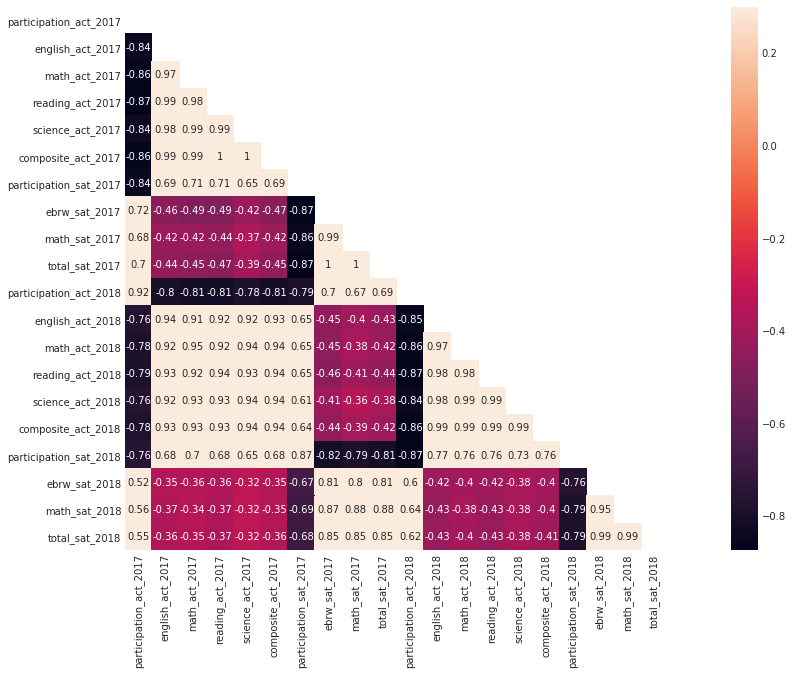

In [92]:
plt.figure(figsize=(20,10))
mask = np.zeros_like(df_merged_final.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
     sns.heatmap(df_merged_final.corr(),mask=mask,vmax=.3, square=True, annot=True);
#sns.heatmap(df_merged_final.corr(),linewidths=0.5,vmax=0.3,annot=True);

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [93]:
df_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 20 columns):
participation_act_2017    51 non-null float64
english_act_2017          51 non-null float64
math_act_2017             51 non-null float64
reading_act_2017          51 non-null float64
science_act_2017          51 non-null float64
composite_act_2017        51 non-null float64
participation_sat_2017    51 non-null float64
ebrw_sat_2017             51 non-null float64
math_sat_2017             51 non-null float64
total_sat_2017            51 non-null float64
participation_act_2018    51 non-null float64
english_act_2018          51 non-null float64
math_act_2018             51 non-null float64
reading_act_2018          51 non-null float64
science_act_2018          51 non-null float64
composite_act_2018        51 non-null float64
participation_sat_2018    51 non-null float64
ebrw_sat_2018             51 non-null float64
math_sat_2018             51 non-null float64
total_sat_2018   

In [94]:
df_merged_final[df_merged_final['participation_sat_2018']<20]['participation_sat_2018'].count()

20

In [95]:
#function to plot histogram using subplots
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels,list_of_ylabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(12,12)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], label = list_of_xlabels, rwidth = 0.5, alpha = 0.7) # feel free to add more settings
        ax[i].set_title(list_of_titles[i], fontsize = 12,color="blue")
        ax[i].set_xlabel(list_of_xlabels[i], fontsize = 12)
        ax[i].set_ylabel(list_of_ylabels[i], fontsize = 12)
        ax[i].set_ylim(0, 23) # Revisit this
        ax[i].grid(axis = 'y', alpha = 0.5) # set grid line, alpha is transparency
        ax[i].legend(loc = 'upper right')

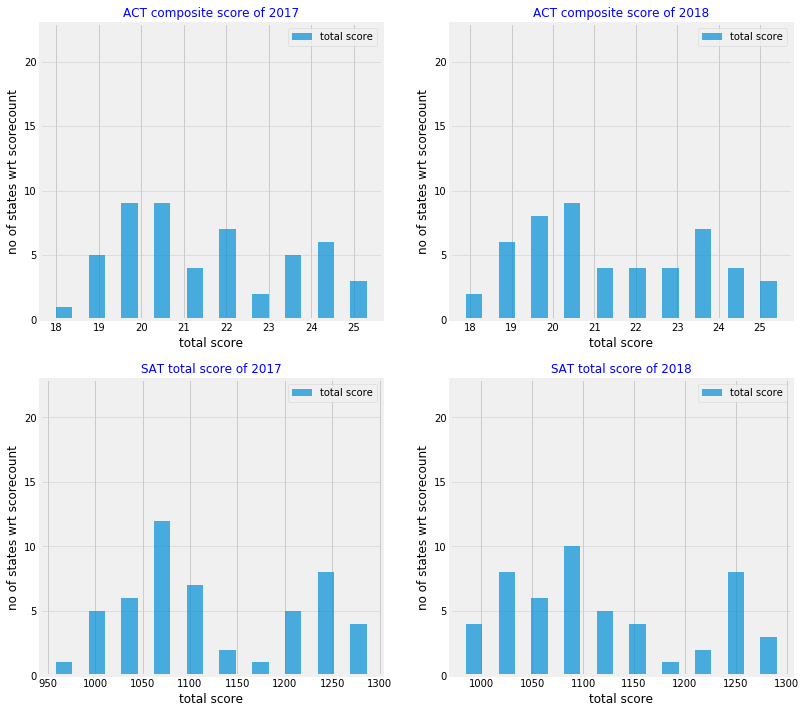

In [96]:
list_of_columns=['composite_act_2017','composite_act_2018','total_sat_2017','total_sat_2018']
list_of_titles=['ACT composite score of 2017','ACT composite score of 2018',
                'SAT total score of 2017','SAT total score of 2018']
list_of_xlabels=['total score','total score','total score','total score']
list_of_ylabels=['no of states wrt scorecount','no of states wrt scorecount',
                 'no of states wrt scorecount','no of states wrt scorecount']

subplot_histograms(df_merged_final,list_of_columns,list_of_titles,list_of_xlabels,list_of_ylabels)


#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

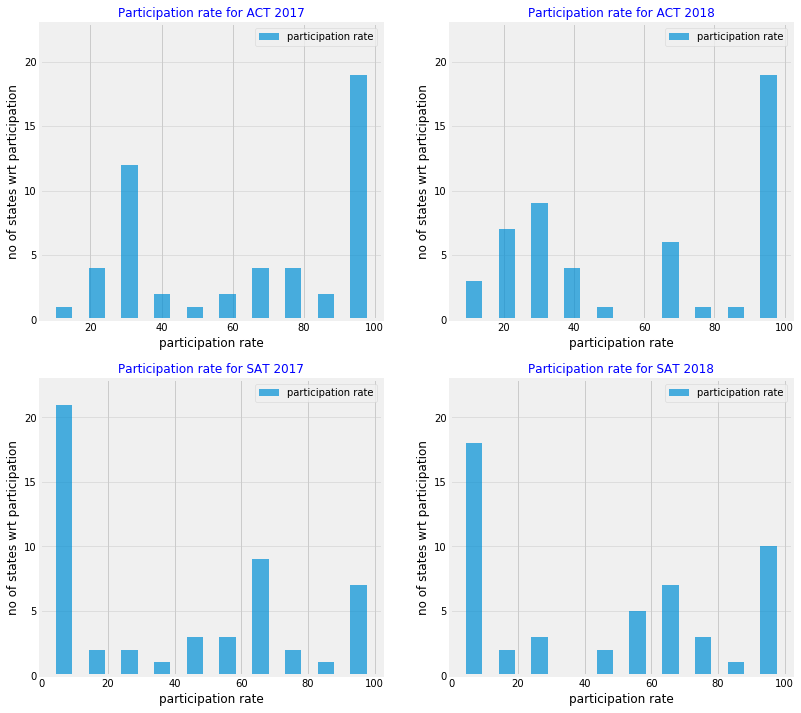

In [97]:
# Participation rates for SAT and ACT
list_of_columns=['participation_act_2017','participation_act_2018','participation_sat_2017','participation_sat_2018']
list_of_titles=['Participation rate for ACT 2017','Participation rate for ACT 2018',
                'Participation rate for SAT 2017','Participation rate for SAT 2018']
list_of_xlabels=['participation rate','participation rate','participation rate','participation rate']
list_of_ylabels=['no of states wrt participation','no of states wrt participation',
                 'no of states wrt participation','no of states wrt participation']

subplot_histograms(df_merged_final,list_of_columns,list_of_titles,list_of_xlabels,list_of_ylabels)

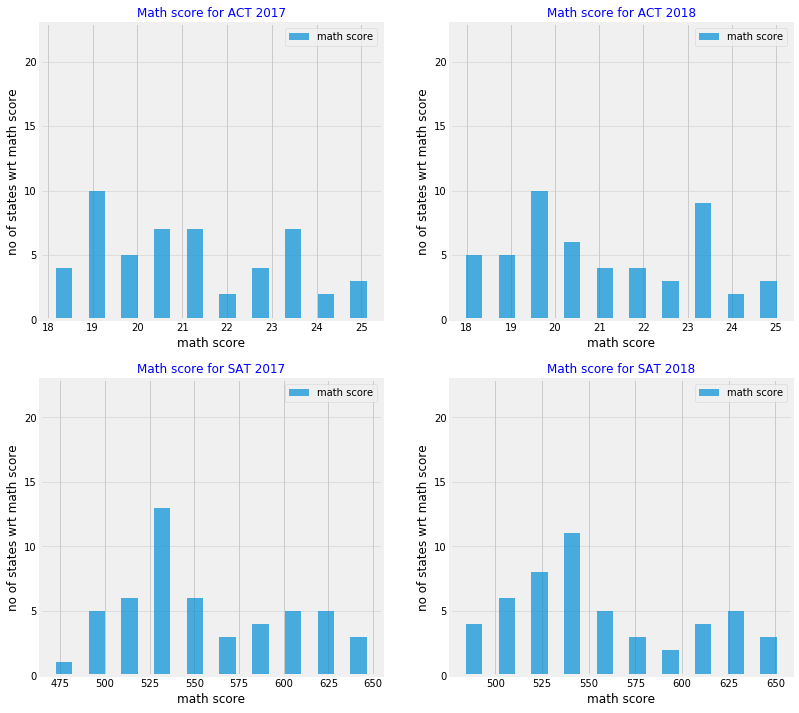

In [98]:
# Math scores for SAT and ACT
list_of_columns=['math_act_2017','math_act_2018','math_sat_2017','math_sat_2018']
list_of_titles=['Math score for ACT 2017','Math score for ACT 2018',
                'Math score for SAT 2017','Math score for SAT 2018']
list_of_xlabels=['math score','math score','math score','math score']
list_of_ylabels=['no of states wrt math score','no of states wrt math score',
                 'no of states wrt math score','no of states wrt math score']

subplot_histograms(df_merged_final,list_of_columns,list_of_titles,list_of_xlabels,list_of_ylabels)

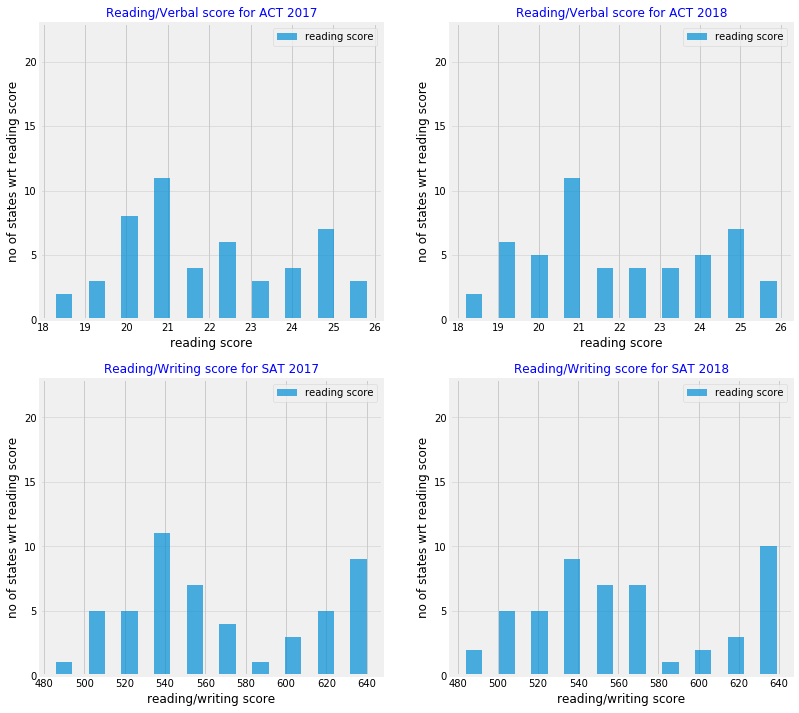

In [99]:
# Reading/Verbal scores for SAT and ACT
list_of_columns=['reading_act_2017','reading_act_2018','ebrw_sat_2017','ebrw_sat_2018']
list_of_titles=['Reading/Verbal score for ACT 2017','Reading/Verbal score for ACT 2018',
                'Reading/Writing score for SAT 2017','Reading/Writing score for SAT 2018']
list_of_xlabels=['reading score','reading score','reading/writing score','reading/writing score']
list_of_ylabels=['no of states wrt reading score','no of states wrt reading score',
                 'no of states wrt reading score','no of states wrt reading score']

subplot_histograms(df_merged_final,list_of_columns,list_of_titles,list_of_xlabels,list_of_ylabels)

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [100]:
#function to plot scatter plot using subplots and matplotlib
def subplot_scatter(df_merged_final,listof_x_columns, list_of_y_columns, 
                    list_of_title, list_of_xlabel,list_of_ylabel):
    nrows = int(np.ceil(len(listof_x_columns)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(15,15))
    ax = ax.ravel()
    for i in (range(len(list_of_x_columns))):
        ax[i].scatter(df_merged_final[listof_x_columns[i]],
                      df_merged_final[list_of_y_columns[i]],s=50,c='b')
        ax[i].set_title(list_of_title[i], fontsize = 12,color="blue")
        ax[i].set_xlabel(list_of_xlabel[i])
        ax[i].set_ylabel(list_of_ylabel[i])

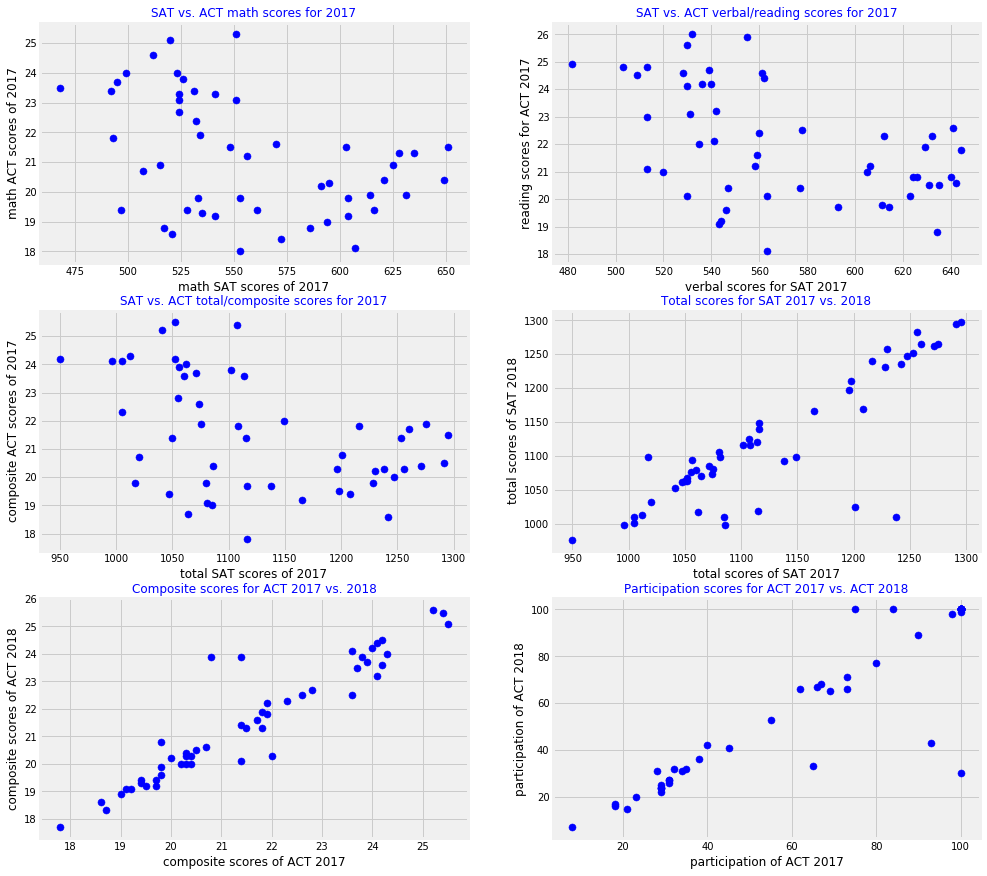

In [101]:
list_of_x_columns=['math_sat_2017','ebrw_sat_2017','total_sat_2017','total_sat_2017','composite_act_2017',
                  'participation_act_2017']
list_of_y_columns=['math_act_2017','reading_act_2017','composite_act_2017','total_sat_2018','composite_act_2018',
                  'participation_act_2018']
list_of_title=['SAT vs. ACT math scores for 2017',
              'SAT vs. ACT verbal/reading scores for 2017',
              'SAT vs. ACT total/composite scores for 2017',
              'Total scores for SAT 2017 vs. 2018',
              'Composite scores for ACT 2017 vs. 2018',
              'Participation scores for ACT 2017 vs. ACT 2018']
list_of_xlabel=['math SAT scores of 2017','verbal scores for SAT 2017',
               'total SAT scores of 2017','total scores of SAT 2017',
               'composite scores of ACT 2017','participation of ACT 2017']
list_of_ylabel=['math ACT scores of 2017','reading scores for ACT 2017',
               'composite ACT scores of 2017','total scores of SAT 2018',
               'composite scores of ACT 2018','participation of ACT 2018']
subplot_scatter(df_merged_final,list_of_x_columns, list_of_y_columns,
               list_of_title,list_of_xlabel,list_of_ylabel)

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [102]:
#function to plot boxplot using seaborn
def subplot_boxplot(df_merged_final,list_of_columns,title,xlabel,ylabel):
    nrows = int(np.ceil(len(list_of_columns)/2))
    fig = plt.subplots(nrows=1, ncols=1,figsize=(10,10))
    ax = sns.boxplot(data=df_merged_final[list_of_columns]) 
    ax.set_title(title, fontsize = 12,color="blue")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

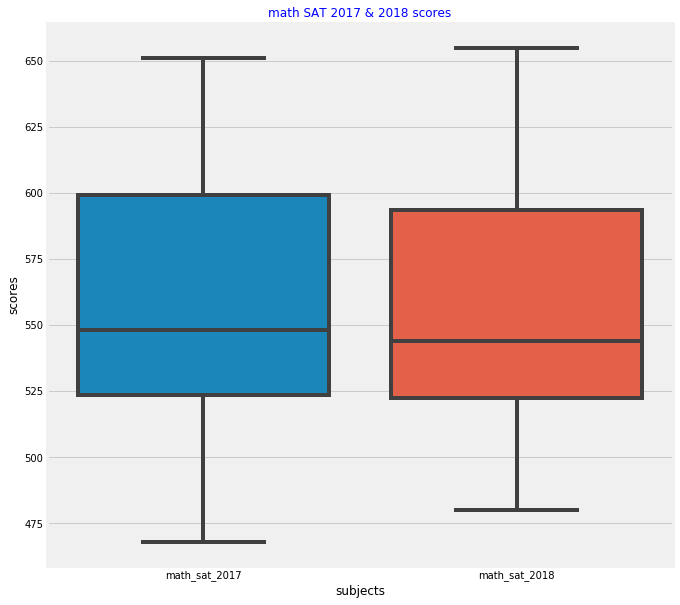

In [103]:
list_of_columns=['math_sat_2017','math_sat_2018']
subplot_boxplot(df_merged_final,list_of_columns,'math SAT 2017 & 2018 scores','subjects','scores')

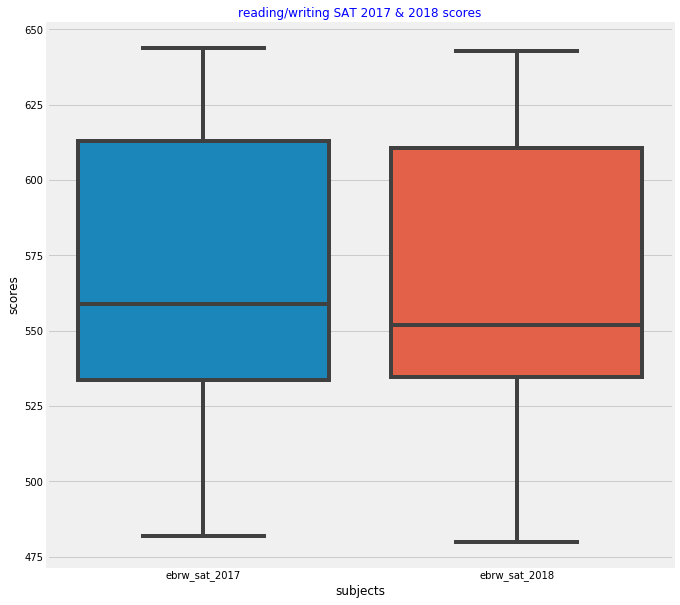

In [104]:
list_of_columns=['ebrw_sat_2017','ebrw_sat_2018']
subplot_boxplot(df_merged_final,list_of_columns,'reading/writing SAT 2017 & 2018 scores','subjects','scores')

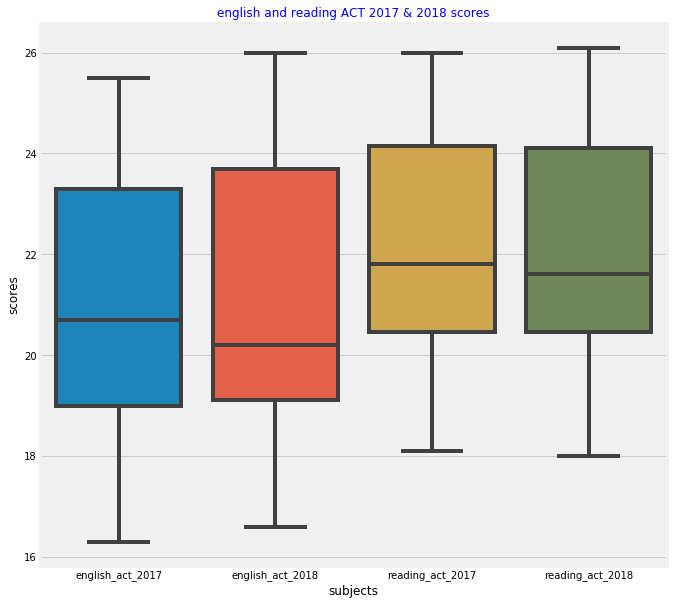

In [105]:
list_of_columns=['english_act_2017','english_act_2018','reading_act_2017','reading_act_2018']
subplot_boxplot(df_merged_final,list_of_columns,'english and reading ACT 2017 & 2018 scores','subjects','scores')

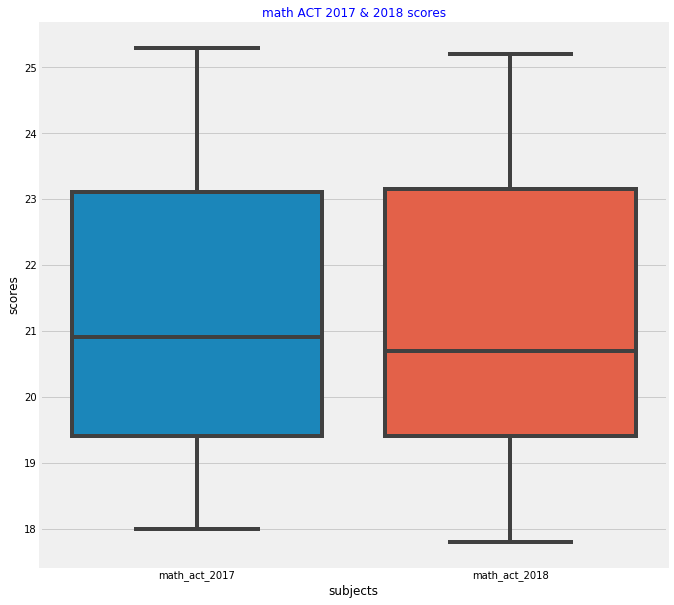

In [106]:
list_of_columns=['math_act_2017','math_act_2018']
subplot_boxplot(df_merged_final,list_of_columns,'math ACT 2017 & 2018 scores','subjects','scores')

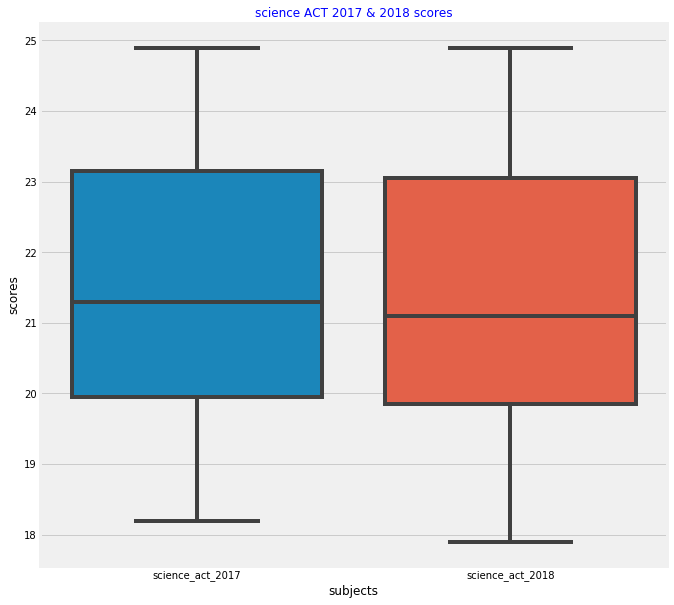

In [107]:
list_of_columns=['science_act_2017','science_act_2018']
subplot_boxplot(df_merged_final,list_of_columns,'science ACT 2017 & 2018 scores','subjects','scores')

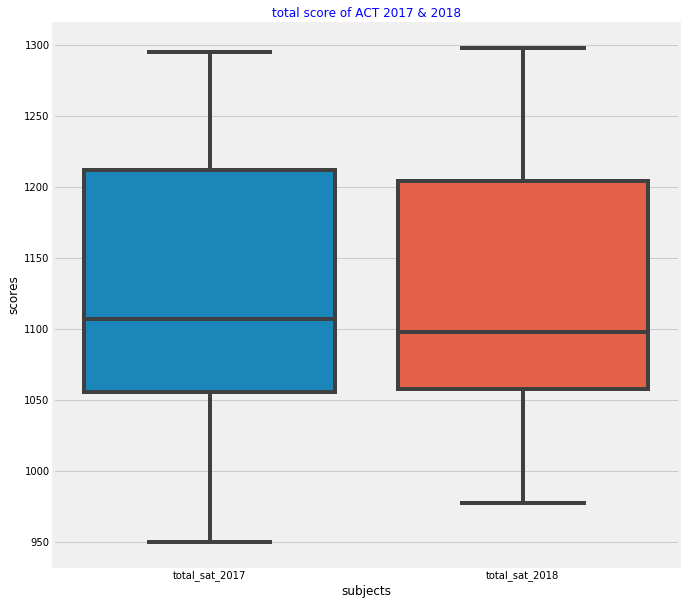

In [108]:
list_of_columns=['total_sat_2017','total_sat_2018']
subplot_boxplot(df_merged_final,list_of_columns,'total score of ACT 2017 & 2018','subjects','scores')

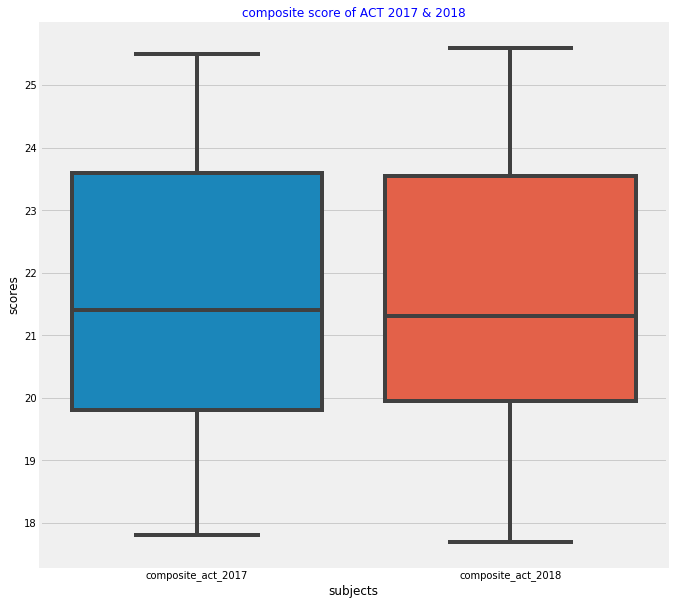

In [109]:
list_of_columns=['composite_act_2017','composite_act_2018']
subplot_boxplot(df_merged_final,list_of_columns,'composite score of ACT 2017 & 2018','subjects','scores')

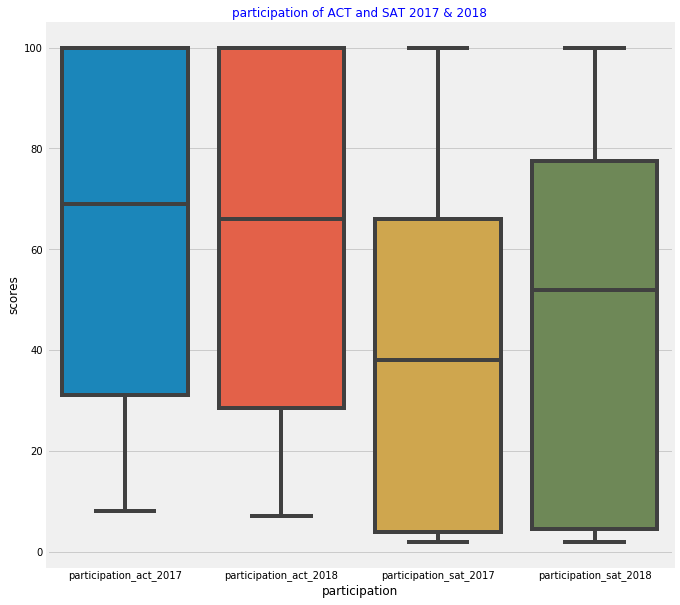

In [110]:
list_of_columns=['participation_act_2017','participation_act_2018','participation_sat_2017','participation_sat_2018']
subplot_boxplot(df_merged_final,list_of_columns,'participation of ACT and SAT 2017 & 2018','participation','scores')

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [111]:
df_merged_final.composite_act_2018.quantile(0.25)

19.95

In [112]:
df_merged_final.composite_act_2018.quantile(0.75)

23.55

In [113]:
df_merged_final.composite_act_2018.describe()

count    51.000000
mean     21.486275
std       2.106278
min      17.700000
25%      19.950000
50%      21.300000
75%      23.550000
max      25.600000
Name: composite_act_2018, dtype: float64

In [114]:
df_merged_final[df_merged_final['composite_act_2018']>df_merged_final.composite_act_2018.quantile(0.75)]['composite_act_2018'].sort_values()

State
District of Columbia    23.6
New Jersey              23.7
Colorado                23.9
Illinois                23.9
Virginia                23.9
Maine                   24.0
Vermont                 24.1
Rhode Island            24.2
Michigan                24.4
New York                24.5
New Hampshire           25.1
Massachusetts           25.5
Connecticut             25.6
Name: composite_act_2018, dtype: float64

In [115]:
df_merged_final[df_merged_final['composite_act_2018']>df_merged_final.composite_act_2018.quantile(0.75)]['composite_act_2018'].count()

13

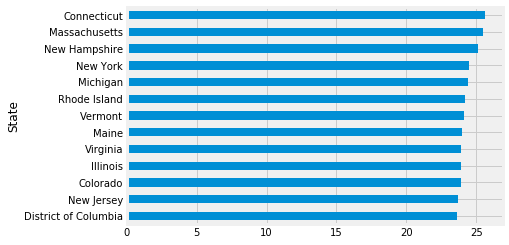

In [116]:
#13 countries with ACT composite score of yr 2018 greter than 23.55 and in 75th percentile

df_merged_final[df_merged_final['composite_act_2018']>df_merged_final.composite_act_2018.quantile(0.75)]['composite_act_2018'].sort_values().plot(kind='barh');

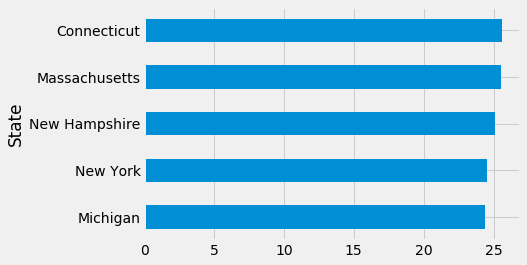

In [117]:
#for ACT 2018 composite score
#only 5 countries in 90th percentile and Connecticut being the highest composite scorer with score of 25.6
plt.style.use('fivethirtyeight')
df_merged_final[df_merged_final['composite_act_2018']>df_merged_final.composite_act_2018.quantile(0.90)]['composite_act_2018'].sort_values().plot(kind='barh');

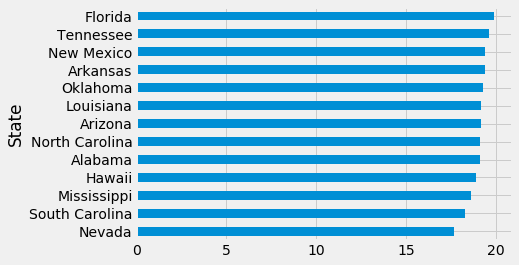

In [118]:
#13 countries with ACT composite score of yr 2018 less than 19.95 and in 25th percentile
plt.style.use('fivethirtyeight')
df_merged_final[df_merged_final['composite_act_2018']<df_merged_final.composite_act_2018.quantile(0.25)]['composite_act_2018'].sort_values().plot(kind='barh');

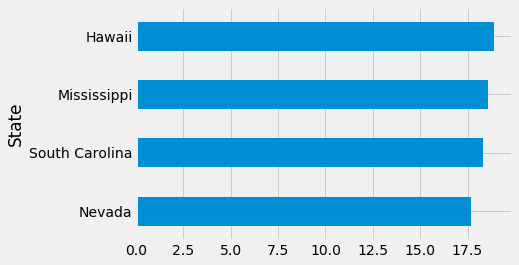

In [119]:
#for ACT composite score oy year 2018
#4 countries in 10th percentile and Nevada being the least scorer with score of 17.70
plt.style.use('fivethirtyeight')
df_merged_final[df_merged_final['composite_act_2018']<df_merged_final.composite_act_2018.quantile(0.10)]['composite_act_2018'].sort_values().plot(kind='barh');

###### Information inferred
Also it can be seen from plotted boxplots of composite score of ACT 2017 and 2018 that in 2018, lesser number of countries (25 in number) are in 50th percentile as compared to number of countries(28 in number) in 2017

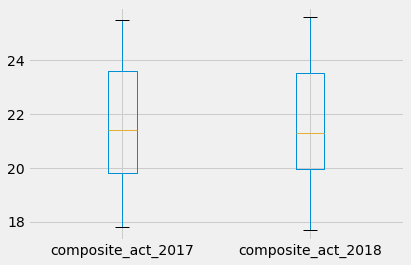

In [120]:
df_merged_final.boxplot(column=['composite_act_2017','composite_act_2018'])

In [121]:
df_merged_final.composite_act_2017.quantile([0.25,0.75])

0.25    19.8
0.75    23.6
Name: composite_act_2017, dtype: float64

In [122]:
df_merged_final.composite_act_2018.quantile([0.25,0.75])

0.25    19.95
0.75    23.55
Name: composite_act_2018, dtype: float64

In [123]:
df_merged_final.composite_act_2017.quantile(q=[0.25, 0.5, 0.75])

0.25    19.8
0.50    21.4
0.75    23.6
Name: composite_act_2017, dtype: float64

In [124]:
df_merged_final[(df_merged_final['composite_act_2017']>=df_merged_final.composite_act_2017.quantile(0.25))&
               (df_merged_final['composite_act_2017']<=df_merged_final.composite_act_2017.quantile(0.75))
               ]['composite_act_2017'].sort_values().count()#.plot(kind='barh');

28

In [125]:
df_merged_final[(df_merged_final['composite_act_2018']>=df_merged_final.composite_act_2018.quantile(0.25))&
               (df_merged_final['composite_act_2018']<=df_merged_final.composite_act_2018.quantile(0.75))
               ]['composite_act_2018'].sort_values().count()#.plot(kind='barh');

25

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [126]:
df_merged_final.describe()

,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2017,ebrw_sat_2017,math_sat_2017,total_sat_2017,participation_act_2018,english_act_2018,math_act_2018,reading_act_2018,science_act_2018,composite_act_2018,participation_sat_2018,ebrw_sat_2018,math_sat_2018,total_sat_2018
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.449020,21.519608,39.803922,569.117647,556.882353,1126.098039,61.647059,20.988235,21.125490,22.015686,21.345098,21.486275,45.745098,563.686275,556.235294,1120.019608
std,32.140842,2.353677,1.981989,2.067271,1.737397,2.020695,35.276632,45.666901,47.121395,92.494812,34.080976,2.446356,2.035765,2.167245,1.870114,2.106278,37.314256,47.502627,47.772623,94.155083
min,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,482.000000,468.000000,950.000000,7.000000,16.600000,17.800000,18.000000,17.900000,17.700000,2.000000,480.000000,480.000000,977.000000
25%,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.000000,533.500000,523.500000,1055.500000,28.500000,19.100000,19.400000,20.450000,19.850000,19.950000,4.500000,534.500000,522.500000,1057.500000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,38.000000,559.000000,548.000000,1107.000000,66.000000,20.200000,20.700000,21.600000,21.100000,21.300000,52.000000,552.000000,544.000000,1098.000000
75%,100.000000,23.300000,23.100000,24.150000,23.150000,23.600000,66.000000,613.000000,599.000000,1212.000000,100.000000,23.700000,23.150000,24.100000,23.050000,23.550000,77.500000,610.500000,593.500000,1204.000000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,644.000000,651.000000,1295.000000,100.000000,26.000000,25.200000,26.100000,24.900000,25.600000,100.000000,643.000000,655.000000,1298.000000


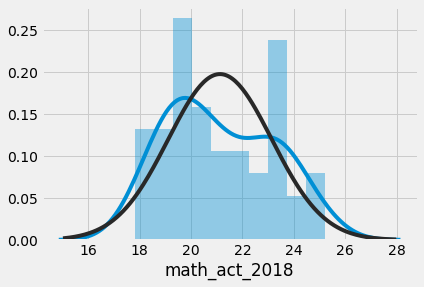

In [127]:
sns.distplot(df_merged_final['math_act_2018'], fit=norm,bins=10, kde = True);

In [128]:
#null hypothesis that math score of ACT 2018 is normal
stats.normaltest(df_merged_final['math_act_2018'])

NormaltestResult(statistic=9.493830792428861, pvalue=0.008678423456739134)

Ans: Score of Math ACT 2018 is slightly right skewed. From normal distribution test, it can seen that pvalue for the math score of ACT 2018 is less than 0.05 so the null hypothesis that math score of ACT 2018 is normal is rejected. 

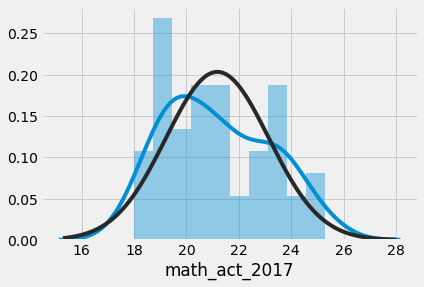

In [129]:
sns.distplot(df_merged_final['math_act_2017'], fit=norm,bins=10, kde = True);

In [130]:
#null hypothesis that math score of ACT 2017 is normal
stats.normaltest(df_merged_final['math_act_2017'])

NormaltestResult(statistic=6.547294554392776, pvalue=0.03786805958606832)

Ans: Score of Math ACT 2017 is slightly right skewed. It can seen that pvalue for the math score of ACT 2017 is less than 0.05 so the null hypothesis that math score of ACT 2017 is normal is rejected

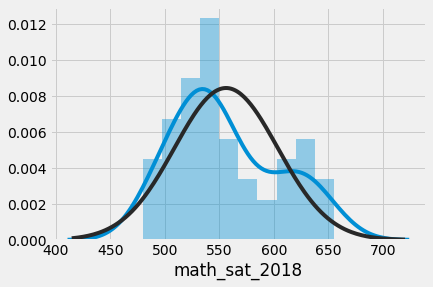

In [131]:
sns.distplot(df_merged_final['math_sat_2018'], fit=norm,bins=10, kde = True);

In [132]:
#null hypothesis that math score of SAT 2018 is normal
stats.normaltest(df_merged_final['math_sat_2018'])

NormaltestResult(statistic=4.8457529089366815, pvalue=0.08866620599134843)

Ans: It can be seen that the p-value is greater than 0.05 so the null hypothesis is accepted that math score of SAT 2018 is normally distributed

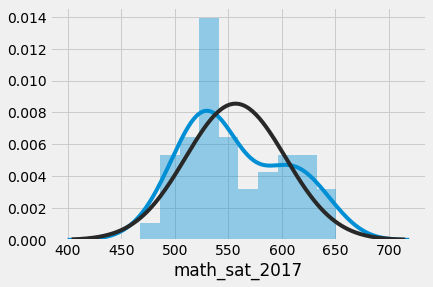

In [133]:
sns.distplot(df_merged_final['math_sat_2017'], fit=norm,bins=10, kde = True);

In [134]:
#null hypothesis that math score of SAT 2018 is normal
stats.normaltest(df_merged_final['math_sat_2017'])

NormaltestResult(statistic=5.762201767738943, pvalue=0.056072998982864684)

Ans: It can be seen that the p-value is greater than 0.05 so the null hypothesis is accepted that math score of SAT 2017 is normally distributed

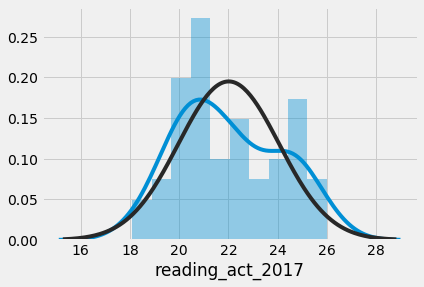

In [135]:
sns.distplot(df_merged_final['reading_act_2017'], bins=10, kde = True,fit=norm);

In [136]:
#null hypothesis that score of reading ACT 2017 is normal distributed
stats.normaltest(df_merged_final['reading_act_2017'])

NormaltestResult(statistic=6.248639549660324, pvalue=0.04396683079879635)

Ans: Score of Reading ACT 2017 is slightly right skewed. It can seen that pvalue for the reading score of ACT 2017 is less than 0.05 so the null hypothesis that reading score of ACT 2017 is normal is rejected

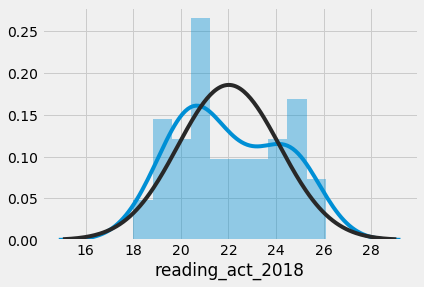

In [137]:
sns.distplot(df_merged_final['reading_act_2018'], bins=10, kde = True,fit=norm);

In [138]:
#null hypothesis that reading score of ACT 2018 is normal distributed
stats.normaltest(df_merged_final['reading_act_2018'])

NormaltestResult(statistic=9.408698591449367, pvalue=0.009055804952130748)

Ans: Score of Reading ACT 2018 is slightly right skewed. It can seen that pvalue for the reading score of ACT 2018 is less than 0.05 so the null hypothesis that reading score of ACT 2018 is normal is rejected

In [139]:
#Function to check for p-value and normal distribution of all coulmns 
#in merged data frame of ACT and SAT score of 2017 & 2018
## Null Hypothesis that all columns are normally distributed
def normal_stats(dataframe1):
    t_and_p_value = {}
    for col in dataframe1:
        t_val,p_val = stats.normaltest(df_merged_final[col])
        t_and_p_value1 = {col:{'t_val':t_val,
                             'p_val':p_val}}
        t_and_p_value.update(t_and_p_value1)
    return t_and_p_value

In [140]:
t_test_dict = normal_stats(df_merged_final)

In [141]:
for col in df_merged_final:
    if t_test_dict[col]['p_val'] > 0.05:
        print('not normally distributed: {0} with p-value {1}'.format(col,t_test_dict[col]['p_val']))
for col in df_merged_final:
    if t_test_dict[col]['p_val'] < 0.05:
        print('normally distributed: {0} with p-value {1}'.format(col,t_test_dict[col]['p_val']))

not normally distributed: english_act_2017 with p-value 0.08434764489205682
not normally distributed: science_act_2017 with p-value 0.06760926544137379
not normally distributed: math_sat_2017 with p-value 0.056072998982864684
not normally distributed: math_sat_2018 with p-value 0.08866620599134843
normally distributed: participation_act_2017 with p-value 1.8018419611696254e-16
normally distributed: math_act_2017 with p-value 0.03786805958606832
normally distributed: reading_act_2017 with p-value 0.04396683079879635
normally distributed: composite_act_2017 with p-value 0.03767739587231253
normally distributed: participation_sat_2017 with p-value 4.028943345766873e-06
normally distributed: ebrw_sat_2017 with p-value 0.0009986795076584
normally distributed: total_sat_2017 with p-value 0.008200230814088539
normally distributed: participation_act_2018 with p-value 1.1798576998141957e-31
normally distributed: english_act_2018 with p-value 0.011118664949764285
normally distributed: math_act_2

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: Since the p-value for most of the columns is less than 0.05 so for all those columns null hypothesis can be rejected that the population is noramlly distributed. However it doesnt hold true for English & Science scores of ACT 2017 and Math SAT scores of 2017 & 2018. Also for participation rate of ACT & SAT of 2017 & 2018 since the p-value is very very less than 0.05 so there is not enough evidence to accept the null hypothesis

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:As can be seen from above stats, 1) For Math SAT 2017 & 2018, p-value > 0.05 so the null hypothesis is accepted that the population is normally distributed

For Reading ACT 2017 & 2018, p-value < 0.05 so the null hypothesis is rejected that the population is normally distributed

For participation rate of ACT & SAT 2017 & 2018, p-value is very less than 0.05 so there is not enough evidence to say that the distribution is normal

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Ans: Since every score of SAT and ACT and even participation rate has high standard deviation so the distribution is not normal. Also can be seen from distribution plot from below that participation of ACT 2018 is not a normal distribution

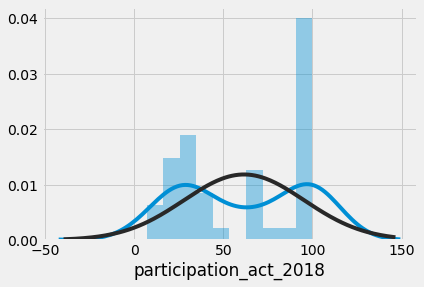

In [142]:
sns.distplot(df_merged_final['participation_act_2018'], bins=10, kde = True,fit=norm);

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: As per t-test, Its appropriate to compare the SAT score of math 2017 & 2018 since p-value > 0.05. 
Its appropriate to compare the ACT score of math of 2017 & 2018. 
Its not appropriate to compare the SAT & ACT score of 2017 and SAT & ACT score of 2018

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [143]:
df_merged_final.describe()

,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2017,ebrw_sat_2017,math_sat_2017,total_sat_2017,participation_act_2018,english_act_2018,math_act_2018,reading_act_2018,science_act_2018,composite_act_2018,participation_sat_2018,ebrw_sat_2018,math_sat_2018,total_sat_2018
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.449020,21.519608,39.803922,569.117647,556.882353,1126.098039,61.647059,20.988235,21.125490,22.015686,21.345098,21.486275,45.745098,563.686275,556.235294,1120.019608
std,32.140842,2.353677,1.981989,2.067271,1.737397,2.020695,35.276632,45.666901,47.121395,92.494812,34.080976,2.446356,2.035765,2.167245,1.870114,2.106278,37.314256,47.502627,47.772623,94.155083
min,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,482.000000,468.000000,950.000000,7.000000,16.600000,17.800000,18.000000,17.900000,17.700000,2.000000,480.000000,480.000000,977.000000
25%,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.000000,533.500000,523.500000,1055.500000,28.500000,19.100000,19.400000,20.450000,19.850000,19.950000,4.500000,534.500000,522.500000,1057.500000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,38.000000,559.000000,548.000000,1107.000000,66.000000,20.200000,20.700000,21.600000,21.100000,21.300000,52.000000,552.000000,544.000000,1098.000000
75%,100.000000,23.300000,23.100000,24.150000,23.150000,23.600000,66.000000,613.000000,599.000000,1212.000000,100.000000,23.700000,23.150000,24.100000,23.050000,23.550000,77.500000,610.500000,593.500000,1204.000000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,644.000000,651.000000,1295.000000,100.000000,26.000000,25.200000,26.100000,24.900000,25.600000,100.000000,643.000000,655.000000,1298.000000


In [144]:
#null hypothesis: that there is no variance in mean scores of ACT scores of math 2017 and 2018
#t-test
sample_math_act_2017=df_merged_final['math_act_2017']
sample_math_act_2018=df_merged_final['math_act_2018']
print(np.var(sample_math_act_2017))
print(np.var(sample_math_act_2018))
#t-test
stats.ttest_ind(sample_math_act_2017,sample_math_act_2018,equal_var=False)


3.8512572087658596
4.0630757400999595


Ttest_indResult(statistic=0.1429241656548978, pvalue=0.8866378692365904)

Ans: since the pvalue > 0.05 so there is insufficient evidence to reject the hypothesis that the mean score of math of ACT 2017 and 2018 is similar 

In [145]:
#null hypothesis that its appropriate to compare mean SAT score of math 2017 and 2018
#t-test
sample_math_sat_2017=df_merged_final['math_sat_2017']
sample_math_sat_2018=df_merged_final['math_sat_2018']
print(np.var(sample_math_sat_2017))
print(np.var(sample_math_sat_2018))
#t-test
stats.ttest_ind(sample_math_sat_2017,sample_math_sat_2018,equal_var=False)

2176.888119953863
2237.4740484429058


Ttest_indResult(statistic=0.06886440276247592, pvalue=0.9452350939411734)

Ans: since the pvalue > 0.05 so there is not enough evidence to reject the hypothesis that its appropriate to compare SAT score of 2017 and 2018

In [146]:
#null hypothesis that its appropriate to compare mean SAT & ACT score of math 2017
#t-test
sample_math_act_2017=df_merged_final['math_act_2017']
sample_math_sat_2017=df_merged_final['math_sat_2017']
print(np.var(sample_math_act_2017))
print(np.var(sample_math_sat_2017))
#t-test
stats.ttest_ind(sample_math_act_2017,sample_math_sat_2017,equal_var=False)

3.8512572087658596
2176.888119953863


Ttest_indResult(statistic=-81.11567112237414, pvalue=6.892370927017584e-55)

Ans: since the pvalue is very less so the null hypothesis is rejected that its appropriate to compare ACT and SAT score of math of 2017

In [147]:
#null hypothesis that its appropriate to compare mean SAT & ACT score of math 2018
#t-test
sample_math_act_2018=df_merged_final['math_act_2018']
sample_math_sat_2018=df_merged_final['math_sat_2018']
print(np.var(sample_math_act_2018))
print(np.var(sample_math_sat_2018))
#t-test
stats.ttest_ind(sample_math_act_2018,sample_math_sat_2018,equal_var=False)

4.0630757400999595
2237.4740484429058


Ttest_indResult(statistic=-79.91990188657961, pvalue=1.4309390187113448e-54)

Ans: since the pvalue is very less so the null hypothesis is rejected that its appropriate to compare ACT and SAT score of math of 2018

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [148]:
df_merged_final[((df_merged_final['participation_sat_2018']-df_merged_final['participation_sat_2017'])>0)&
                ((df_merged_final['participation_act_2018']-df_merged_final['participation_act_2017'])>0)
               ][['participation_sat_2017','participation_sat_2018',
                 'participation_act_2017','participation_act_2018']].sort_values(by=['participation_act_2018',
                                                                                     'participation_sat_2018'],
                                                                                ascending=False)
#.sort_values().plot(kind='barh')

,participation_sat_2017,participation_sat_2018,participation_act_2017,participation_act_2018
State,,,,
Ohio,12.0,18.0,75.0,100.0
Iowa,2.0,3.0,67.0,68.0
New Mexico,11.0,16.0,66.0,67.0
Oregon,43.0,48.0,40.0,42.0
Maryland,69.0,76.0,28.0,31.0


Ans: Ohio, Iowa and New Mexico are the states with increased percentage in participation rate in SAT and ACT tests in 2018 as compared to 2017

### As per Dayton Daily News dated Feb 22,2017
The state’s plan to require almost all high school juniors to take a free ACT or SAT college entrance exam this spring has drawn wildly different responses from local schools.
In 2015, the median Ohio school district saw 58 percent of its students take the ACT, with a much smaller number taking the SAT. Now the state will pay for the exam (the ACT normally costs $42.50), and schools will administer it on-site during a normal school day, eliminating cost and transportation obstacles for students.
### As per Eductaion Week dated Feb 15,2017
Iowa State Require Students to Take the SAT or ACT as states looked for ways to encourage students to go to college.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

In [149]:
#lowest participation rate for SAT 2017
df_merged_final.sort_values(by='participation_sat_2017',ascending=True)['participation_sat_2017'].head(1)

State
North Dakota    2.0
Name: participation_sat_2017, dtype: float64

In [150]:
#lowest participation rate for SAT 2018
df_merged_final.sort_values(by='participation_sat_2018',ascending=True)['participation_sat_2018'].head(1)

State
North Dakota    2.0
Name: participation_sat_2018, dtype: float64

In [151]:
#lowest participation rate for ACT 2017
df_merged_final.sort_values(by='participation_act_2017',ascending=True)['participation_act_2017'].head(1)

State
Maine    8.0
Name: participation_act_2017, dtype: float64

In [152]:
#lowest participation rate for ACT 2018
df_merged_final.sort_values(by='participation_act_2018',ascending=True)['participation_act_2018'].head(1)

State
Maine    7.0
Name: participation_act_2018, dtype: float64

### North Dakota state has the lowest participation rate for SAT 2017 & 2018
### Maine state has the lowest participation rate for ACT 2017 & 2018

In [160]:
df_merged_final[((df_merged_final['math_act_2018']>df_merged_final.math_act_2018.quantile(0.25))&
                (df_merged_final['math_act_2018']<df_merged_final.math_act_2018.quantile(0.75)))
               ]['math_act_2018'].count()

24

In [161]:
df_merged_final[(df_merged_final['math_act_2018']>df_merged_final.math_act_2018.quantile(0.75))
               ]['math_act_2018'].count()

13

In [165]:
df_merged_final[(df_merged_final['math_act_2018']<df_merged_final.math_act_2018.quantile(0.25))
               ]['math_act_2018'].count()

12

In [167]:
df_merged_final[(df_merged_final['math_act_2018']==df_merged_final.math_act_2018.quantile(0.25))
               ]['math_act_2018'].count()

2

In [169]:
df_merged_final.math_act_2018.quantile(0.50)

20.7

In [168]:
df_merged_final.describe()

,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2017,ebrw_sat_2017,math_sat_2017,total_sat_2017,participation_act_2018,english_act_2018,math_act_2018,reading_act_2018,science_act_2018,composite_act_2018,participation_sat_2018,ebrw_sat_2018,math_sat_2018,total_sat_2018
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.449020,21.519608,39.803922,569.117647,556.882353,1126.098039,61.647059,20.988235,21.125490,22.015686,21.345098,21.486275,45.745098,563.686275,556.235294,1120.019608
std,32.140842,2.353677,1.981989,2.067271,1.737397,2.020695,35.276632,45.666901,47.121395,92.494812,34.080976,2.446356,2.035765,2.167245,1.870114,2.106278,37.314256,47.502627,47.772623,94.155083
min,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,482.000000,468.000000,950.000000,7.000000,16.600000,17.800000,18.000000,17.900000,17.700000,2.000000,480.000000,480.000000,977.000000
25%,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.000000,533.500000,523.500000,1055.500000,28.500000,19.100000,19.400000,20.450000,19.850000,19.950000,4.500000,534.500000,522.500000,1057.500000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,38.000000,559.000000,548.000000,1107.000000,66.000000,20.200000,20.700000,21.600000,21.100000,21.300000,52.000000,552.000000,544.000000,1098.000000
75%,100.000000,23.300000,23.100000,24.150000,23.150000,23.600000,66.000000,613.000000,599.000000,1212.000000,100.000000,23.700000,23.150000,24.100000,23.050000,23.550000,77.500000,610.500000,593.500000,1204.000000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,644.000000,651.000000,1295.000000,100.000000,26.000000,25.200000,26.100000,24.900000,25.600000,100.000000,643.000000,655.000000,1298.000000
